##1. Defining the Business Problem - Disease Prediction from Symptoms

Health care and medical provision is one of the most vital fields in human existence as people need to be well-conditioned physically, mentally, and emotionally to effectively contribute to the promotion of society and economic development. One of the challenges currently being faced in the medical field among several is the delay in diagnosis of diseases. This due to several reasons some of which may include inadequate health practitioners with the growing number of patients and the population.
In July 2023, the National Health Service (NHS) in England conducted a statistical study to give a summary of their operation system pre and post COVID-19. According to the study, it was highlighted that between 2014 and 2017 the performance level of the diagnosis waiting time was consistently between 1% and 2% of patients waiting over 6 weeks. However, between 2018 and early 2020 the diagnostic waiting period increased to 4.4% of patients waiting over 6 weeks. During the COVID-19 pandemic, diagnosis waiting times substantially increased to a peak of 58.5% of patients waiting over 6 weeks in May 2020. In May 2021, the proportion fell to 22.1% and unfortunately as of January 2023, 30.8% of the patients were waiting longer than 6 weeks. Based of this snippet of diagnostic statistics of the NHS England, it gives an overview of the importance of developing business solutions to counter this challenge of delay in diagnosis delivery.  


This assessment seeks to train a machine learning model that will efficiently predict the diagnosis of a patient having a particular disease based on the different range of symptoms (that will be labeled as features).

##2. Data Collection

To train and implement this model, a dataset was collected from https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset?resource=download.



##3. Importing Libraries

Code below imports all necessary libraries needed to run this pipeline.

In [43]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.naive_bayes
import sklearn.neighbors
import sklearn.metrics
import imblearn.over_sampling
import sklearn.decomposition


##4. Loading the Dataset

Loads the dataset with the csv file and visualizes the first five rows of the table.

In [26]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


##5. Splitting the Dataset into Training and Testing Data

The below code splits the dataset into training and testing data before any manipulation to avoid data leakage.

In [27]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.15, random_state=42)
df_train, df_val = sklearn.model_selection.train_test_split(df_train, test_size=0.15, random_state=42)

print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df size: (349, 10)
df_train size: (251, 10)
df_test size: (53, 10)


##6. Data Exploration

The data exploration conducted highlighted that there was no missing value, or outliers in the dataset. The sum of the missing values for each feature was zero.

The length of the target variable was run to check for the total count of uniques values present (Two Unique values were present).

The below code simply shows the Non-null count and data type for each feature column including the target label.

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 303 to 289
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               251 non-null    object
 1   Fever                 251 non-null    object
 2   Cough                 251 non-null    object
 3   Fatigue               251 non-null    object
 4   Difficulty Breathing  251 non-null    object
 5   Age                   251 non-null    int64 
 6   Gender                251 non-null    object
 7   Blood Pressure        251 non-null    object
 8   Cholesterol Level     251 non-null    object
 9   Outcome Variable      251 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB


The number of data points under each label in the prognosis column.

In [29]:
df_train["Outcome Variable"].value_counts()

Positive    127
Negative    124
Name: Outcome Variable, dtype: int64

##7. Data Pre-processing

The code below seeks to define the x and y variables (x variables - features and y variable - target label). Drops the "Outcome Variable" column from the X variable as it is the target label.


In [30]:
x_train = df_train.drop(["Outcome Variable"], axis = 1)
y_train = df_train["Outcome Variable"]

x_val = df_val.drop(["Outcome Variable"], axis = 1)
y_val = df_val["Outcome Variable"]


x_test = df_test.drop(["Outcome Variable"], axis = 1)
y_test = df_test["Outcome Variable"]

print('df:', df.shape)
print('x_train:', x_train.shape)
print('x_val:', x_val.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_val.shape)
print('y_test:', y_test.shape)

df: (349, 10)
x_train: (251, 9)
x_val: (45, 9)
x_test: (53, 9)
y_train: (251,)
y_val: (45,)
y_test: (53,)


##8. Feature Engineering

This aims to transform raw data into a trainable dataset. Based on the data exploration, some feature columns should be encoded from categorical to numerical features.

The One-Hot Encoder will be used as it encodes nominal categorical features to one hot numeric array. This transforms categorical features to numerical features.

Hyperparameter "handel_unknown=ignore", sets unknown categories to a one hot encoded column for a feature equal to zero, when a new category is encountered.

###i) One Hot Encoding


In [36]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [49]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # 'ignore' handles unknown categories during transform #Sparse reduces the sparsity in the matrix
encoder.fit(x_train)

x_train = encoder.transform(x_train)
x_val = encoder.transform(x_val)
x_test = encoder.transform(x_test)

print("x_train size:", x_train.shape)
print("x_val size:", x_val.shape)
print("x_test size:", x_test.shape)

x_train size: (251, 132)
x_val size: (45, 132)
x_test size: (53, 132)


###ii.) Scaling Features


Hyperparameter "with_mean=False", implies that the scaled data will be equal to zero. Scales data without centering it enabling the preservation of the original data's mean and distribution characteristics.

In [50]:
scaler = sklearn.preprocessing.StandardScaler(with_mean=False)
scaler.fit(x_train)

# Fit and transform the data using the pipeline
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

###iii.) Handling Imbalanced Classes

*   Generates a bar chart of the target column to enable visualization of the count of each unique value.
*  Based on the bar chart, there is minimal imbalance between the two class (positive and negative). As the imbalance is minimal, there is no need for oversampling techniques.

<Axes: >

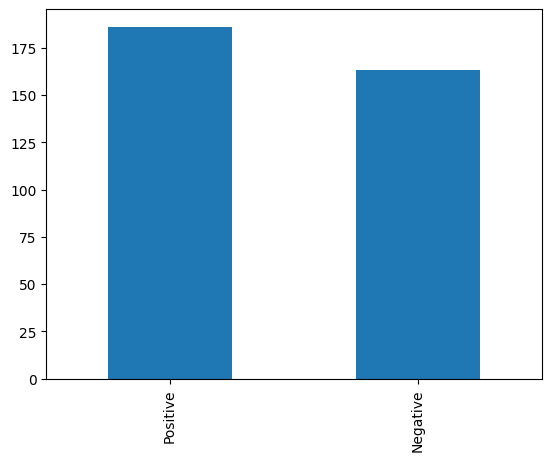

In [51]:
df['Outcome Variable'].value_counts().plot(kind = 'bar')

##Model Selection and Hyperparameter Tuning

Grid search and cross-validation was conducted to select the best model and also find the best combination of hyperparameters for different models. It was possible to play around with the hyperparameters during gridsearch and cross-validation. The main insights gathered have been indicated after the evaluation of the best model.

The below classification models were run, however, the below code only portrays the code run for three (3) models (namely; SVM, Decision Tree and KNN).

*   SVM  - This was the selected predictive model as it was faster than the Random Forest model
*   Decision Tree
*   Logistic Regression
*   Random Forest
*   KNN

The accuracy for the five models was a follows:

*   SVM - Accuracy (0.741) *Good runtime speed*
*   Decision Tree - Accuracy (0.733) *Good runtime speed*
*   Logistic Regression - Accuracy (0.69)
*   Random Forest - Accuracy (0.765) *Long runtime - slow speed*
*   KNN - Accuracy(0.713) *Good runtime speed*

NB: As the dataset size is small, the runtime for most of the models was fast except random forest.


####SVM

Model Hyperparameters:

* kernel - maps the non linear data into higher dimensions, using different types of kernel functions like linear and rbf.
* C - control the regularization strength of the SVM model by choosing from the provided range of values between 0.001 to 100.

GridSearchCV is run using the base SVM classifier, the provided grid of parameters, the accuracy metric (selected because the error in predicting all class is equally important in this pipeline), cv=20 is the number of folds (1 fold used as the validation set and the rest of the folds are used as training sets) and n_jobs=-1 (means computation should be distributed across all available CPU cores).

Then the model fit code fits the SVM model in the training data (x and y train) while simultaneously conducting grid search and cross-validation.


In [59]:
svm_parameters_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}
svm_model = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                               svm_parameters_grid, scoring="accuracy", cv=20, n_jobs=-1)
svm_model.fit(x_train, y_train)
print(f"The accuracy of svm classifier = {svm_model.best_score_}")
print(f"The best found hyperparameters of svm classifier = {svm_model.best_params_}")

The accuracy of svm classifier = 0.7413461538461539
The best found hyperparameters of svm classifier = {'C': 10, 'kernel': 'rbf'}


####Decision Tree

Model Hyperparameters:

* criterion - indicates the functions that can be used to measure the quality of the split in this case the entropy, gini and log-loss function are being used.
* max_depth - controls the maximum depth of the decision trees in this pipeline a range from 1 to 40 is used with a step size of 3.
* min_sample_split - determines the minimum number of samples needed to split an internal code with a range from 2 to 40 with step size of 3.

GridSearchCV is run using the base decision tree classifier, the provided grid of parameters, the accuracy metric (selected because the error in predicting all class is equally important in this pipeline), cv=20 is the number of folds (1 fold used as the validation set and the rest of the folds are used as training sets) and the n_jobs=-1 (means computation should be distributed across all available CPU cores).

Then the model fit code fits the decision tree model in the training data (x and y train) while simultaneously conducting grid search and cross-validation.


In [54]:
dt_parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 41, 3),
    "min_samples_split":(2, 41, 3)
}
dt_model = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(),
                                               dt_parameters_grid, scoring="accuracy", cv=20, n_jobs=-1)
dt_model.fit(x_train, y_train)
pred = dt_model.predict(x_val)
print(f"The accuracy of best decision tree classifier = {dt_model.best_score_}")
print(f"The best found hyperparameters of decision tree classifier = {dt_model.best_params_}")

The accuracy of best decision tree classifier = 0.7330128205128206
The best found hyperparameters of decision tree classifier = {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 2}


####KNN

In [56]:
knn_parameters_grid = {
    "n_neighbors": [1, 5, 10, 15, 20, 30],
     "metric": ["minkowski", "euclidean", "manhattan"]
}
knn_model = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                               knn_parameters_grid, scoring="accuracy", cv=20, n_jobs=-1)
knn_model.fit(x_train, y_train)
print(f"The accuracy of best decision tree classifier = {knn_model.best_score_}")
print(f"The best found hyperparameters of decision tree classifier = {knn_model.best_params_}")

The accuracy of best decision tree classifier = 0.7137820512820514
The best found hyperparameters of decision tree classifier = {'metric': 'minkowski', 'n_neighbors': 1}


####Random Forest

In [57]:
rf_parameters_grid = {
    "n_estimators": [100, 200], #The number of trees in the forest
    "criterion" : ["gini", "entropy"], # It measures the quality of the split
    "max_depth": range(1, 30, 3) #The maximum depth of the trees
}
rf_model = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(),
                                               rf_parameters_grid, scoring="accuracy", cv=20, n_jobs=-1)
rf_model.fit(x_train, y_train)
print(f"The accuracy of best rf classifier = {rf_model.best_score_}")
print(f"The best found hyperparameters for the rf classifier = {rf_model.best_params_}")

The accuracy of best rf classifier = 0.7650641025641026
The best found hyperparameters for the rf classifier = {'criterion': 'gini', 'max_depth': 22, 'n_estimators': 100}


##11. Testing the Best Model

In [61]:
y_predicted = svm_model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted)

print("Accuracy =", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy = 0.7924528301886793
Confusion Matrix:
 [[18  4]
 [ 7 24]]


##Insights gathered from Pipeline

*  Since the dataset was small, a higher cross-validation value (cv) was used to there was efficient use of the limited data by repeatedly splitting into smaller training and validation datasets.
*  It was observed that when cv was equal to 5, all the models performed lower than when the model was increased to 20.
*  However, as increasing more folds reduces bias and increases the variance, there is need to ensure that overfitting is avoided in the pipeline. One way would be potentially increaing the dataset if possible to avoid overfitting.
*  The highest accuracy level despite using all the known classification algorithms was 0.80, this could be due to the small size of the dataset used in this pipeline.
*  There is need to train another model on a larger dataset if this machine learning algorithm is to be used large scale.
* As there were no missing values (which is a positive of course), there was not much data exploration done. However, next time I would like to use a larger dataset with missing values to explore different means of handling the missing variables.
*  The trained machine learning algorithm (larger dataset) could be potentially used to predict disease diagnosis and monitoring of symptoms for each patient.


##12. References

Baker, C.(2023). *NHS Key Statistics: England, July 2023*. House of Commons Library. https://researchbriefings.files.parliament.uk/documents/CBP-7281/CBP-7281.pdf. Accessed on the 13th August 2023